In [9]:
import numpy as np 
import seaborn as sns
import pandas as pd
import anndata as ad
import scanpy as sc 
import matplotlib.pyplot as plt

In [22]:
df = pd.DataFrame(np.load('../data/muse_final_spleen_53500.npy'))
# only viz first 10k cells in the same batch
df = df.iloc[:10000,:]
df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.363152,0.344127,1.070623,-0.471006,-0.226232,-0.600915,0.996824,-0.271442,1.159426,1.316958,...,0.032174,1.114833,0.129926,0.188264,-0.909911,-0.611753,1.508332,-0.384525,0.361132,-1.146953
1,-0.210384,0.521545,1.150776,-0.422581,-0.454312,-0.818495,1.057904,-0.080457,1.245990,1.247820,...,-0.266381,1.388544,-0.247085,-0.299681,-1.107503,-0.402532,1.495074,0.349790,0.213927,-1.190044
2,-0.338937,0.635726,1.003778,-0.325379,-0.481290,-0.721374,1.141865,-0.067247,1.129545,1.254569,...,-0.071391,1.013157,-0.078258,0.164580,-1.369058,-0.585081,1.660013,-0.248331,0.129969,-1.394571
3,-0.345445,0.591142,1.150939,-0.103605,0.095208,-0.833000,1.197739,0.060310,1.153949,1.134846,...,-0.050949,1.082324,0.008193,0.178794,-1.470065,-0.672841,1.618713,-0.000656,0.073879,-1.240906
4,-0.860889,0.858195,0.654097,-0.630978,-0.663041,-0.958695,0.491486,-0.427345,1.194921,1.821674,...,0.035389,1.113174,0.170224,-0.260160,-1.620856,0.030355,1.115486,-0.575319,0.314111,-2.258037


In [23]:
df_meta = pd.read_csv('../data/features_and_metadata.csv')
df_meta = df_meta.iloc[:10000,:]
df_meta.head()

,Unnamed: 0.1,Unnamed: 0,cellLabelInImage,cellSize,CD45,Ly6C,TCR,Ly6G,CD19,CD169,...,CD35,CD2135,CD44,nucl,NKp46,cluster.term,centroid_x,centroid_y,field_of_view,cluster.termV2
0,0,1,3,283,0.000000,316.262419,595.768897,49.077602,608.994748,322.609557,...,217.914412,69.250551,0.000000,9100.068826,572.555576,Other,7.717314,240.809187,1,Vessel
1,1,4,7,215,0.000000,0.000000,134.472468,0.000000,1431.469046,73.665657,...,1135.190597,96.309696,0.000000,15071.640583,0.000000,B,5.916279,1334.600000,1,Other
2,2,5,11,397,0.000000,372.035233,899.713809,261.276071,605.481258,1023.287300,...,488.606413,245.895189,236.229915,16381.046106,769.252953,Other,9.277078,1167.989924,1,Vessel
3,3,7,13,500,2966.989105,337.537437,329.896108,37.743424,671.873764,51.828695,...,0.000000,0.000000,942.795851,2283.347509,312.484433,B,11.430000,1026.952000,1,B
4,4,9,15,838,3797.157518,665.627685,1938.002387,368.658711,2616.937947,1682.991647,...,1822.097852,392.223150,5141.479714,23181.488067,575.791169,Mph,10.233890,656.547733,1,Mph


In [24]:
adata = ad.AnnData(df)
sc.pp.scale(adata)
sc.pp.neighbors(adata, n_neighbors=15, use_rep='X')
sc.tl.umap(adata)

/Users/bokaizhu/anaconda3/envs/maxfuse/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/bokaizhu/anaconda3/envs/maxfuse/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


/Users/bokaizhu/anaconda3/envs/maxfuse/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


<Axes: title={'center': 'orig_ann'}, xlabel='UMAP1', ylabel='UMAP2'>

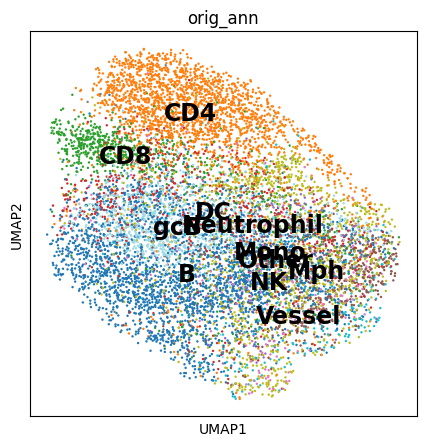

In [25]:
plt.rcParams["figure.figsize"] = (5, 5)
adata.obs['orig_ann'] = df_meta['cluster.termV2'].to_numpy()
sc.pl.umap(adata, color='orig_ann', legend_fontsize=17, show=False, palette='tab20',
          legend_loc= 'on data')

Looks under performing but overall stucture looks correct, assuming method running correctly?

Double check on second batch?

/Users/bokaizhu/anaconda3/envs/maxfuse/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/bokaizhu/anaconda3/envs/maxfuse/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/bokaizhu/anaconda3/envs/maxfuse/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


<Axes: title={'center': 'orig_ann'}, xlabel='UMAP1', ylabel='UMAP2'>

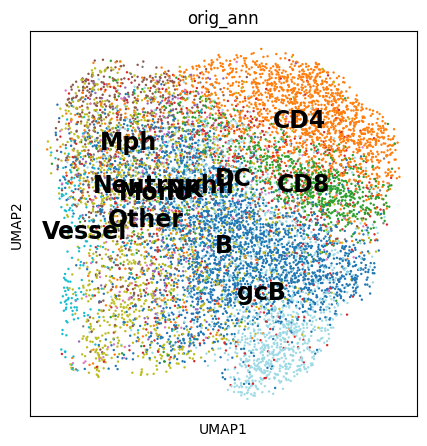

In [26]:
df = pd.DataFrame(np.load('../data/muse_final_spleen_53500.npy'))
# second batch
df = df.iloc[10000:20000,:]
df.head()
df_meta = pd.read_csv('../data/features_and_metadata.csv')
df_meta = df_meta.iloc[10000:20000,:]
df_meta.head()
adata = ad.AnnData(df)
sc.pp.scale(adata)
sc.pp.neighbors(adata, n_neighbors=15, use_rep='X')
sc.tl.umap(adata)
plt.rcParams["figure.figsize"] = (5, 5)
adata.obs['orig_ann'] = df_meta['cluster.termV2'].to_numpy()
sc.pl.umap(adata, color='orig_ann', legend_fontsize=17, show=False, palette='tab20',
          legend_loc= 'on data')

Overall stucture looks correct?

Try third batch too:

/Users/bokaizhu/anaconda3/envs/maxfuse/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/bokaizhu/anaconda3/envs/maxfuse/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/bokaizhu/anaconda3/envs/maxfuse/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


<Axes: title={'center': 'orig_ann'}, xlabel='UMAP1', ylabel='UMAP2'>

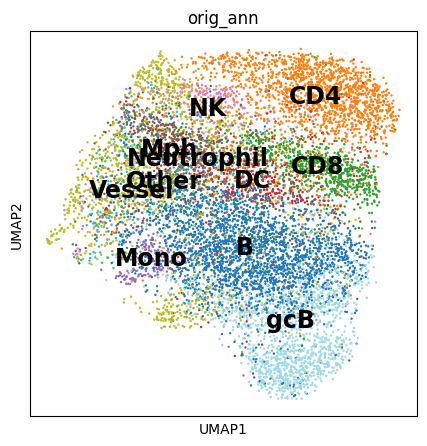

In [27]:
df = pd.DataFrame(np.load('../data/muse_final_spleen_53500.npy'))
# second batch
df = df.iloc[20000:30000,:]
df.head()
df_meta = pd.read_csv('../data/features_and_metadata.csv')
df_meta = df_meta.iloc[20000:30000,:]
df_meta.head()
adata = ad.AnnData(df)
sc.pp.scale(adata)
sc.pp.neighbors(adata, n_neighbors=15, use_rep='X')
sc.tl.umap(adata)
plt.rcParams["figure.figsize"] = (5, 5)
adata.obs['orig_ann'] = df_meta['cluster.termV2'].to_numpy()
sc.pl.umap(adata, color='orig_ann', legend_fontsize=17, show=False, palette='tab20',
          legend_loc= 'on data')

Ok looks correct overall. Confirm method running correctly as default.